# Network Algorithms Project 
## Network Analysis of UNSW IoT Botnet Dataset
## Team AARDVARK
### Members:
|Name|Surname|E-mail|Student ID|
|---|---|---|---|
|KAMAL|AHMADOV|kamal.ahmadov1@ufaz.az|22022692|
|MURAD|MUSTAFAYEV|murad.mustafayev@ufaz.az|22022733|

## Introduction
In the course of this project, we aim to conduct an analysis on a segment of the UNSW IoT Botnet Dataset, accessible at `https://research.unsw.edu.au/projects/bot-iot-dataset`. Our dataset is compartmentalized into three distinct files, namely:
 - `UNSW_2018_IoT_Botnet_Dataset_1.csv`
 - `UNSW_2018_IoT_Botnet_Dataset_3.csv`
 - `UNSW_2018_IoT_Botnet_Dataset_5.csv`
 
 each of which accommodates one million rows of data. Files are located in the `data` folder Each row within these files corresponds to a network packet and encompasses 35 distinctive features.

It is noteworthy that the originally provided Excel file documented 46 features. In light of this disparity, a systematic exploration was undertaken to identify the appropriate column names. This endeavor led us to the realization that all requisite column names were retrievable from the primary source of the dataset.

In [1]:
# Necessary imports for the project
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from tabulate import tabulate
from tqdm.notebook import tqdm
from time import time


### Part 1: Exploring the Data
To commence our analysis, we will first examine and comprehend the dataset. To facilitate this process, we will employ the `pandas` and `numpy` libraries for data reading and manipulation. Additionally, the `tabulate` library will be used to present the data in a visually coherent format.
In this part the requirements are following:
1. Read data from csv files.
2. Describe each attribute in the simplest way.
3. Describe the relations between the attributes.
4. Use statistical tools to represent the data using charts and other tools.

#### 1.1. Data Retrieval
The `numpy` library will be utilized for the extraction of data from the CSV files. Subsequently, the amalgamation of all `numpy` arrays into a unified object will be executed. The `tabulate` library will then be employed to articulate the structural attributes of our dataset.

In [2]:
# Define the path to the directory containing CSV files
path = os.getcwd() + '\\data\\'

# Use glob to identify all CSV files in the specified directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Record the starting time for performance measurement
time_0 = time()
time_1 = time()

# Initialize an empty list to store individual data arrays
data_array = []

# Iterate through each CSV file, load data, and display loading time
for i in range(0, len(csv_files)):
    data_array.append(np.loadtxt(f'{csv_files[i]}', delimiter=',', dtype=object))
    print(f'Dataset № {i + 1} loaded in {(time() - time_0):.2f} seconds')
    time_0 = time()

# Concatenate individual data arrays into a unified data array
data = np.concatenate(data_array, axis=0)

# Calculate the total loading time
loading_time = time() - time_1

# Check if loading time is more than 60 seconds
if loading_time >= 60:
    minutes, seconds = divmod(loading_time, 60)
    print('All data loaded in {} minutes {:.2f} seconds'.format(int(minutes), seconds))
else:
    print('All data loaded in {:.2f} seconds'.format(loading_time))

# Initialize a list to store information about the shape of each dataset
table = []

# Populate the table list with dataset number and its shape
for i in range(len(data_array)):
    table.append((f'Dataset № {i + 1}', data_array[i].shape))

# Add an entry for the combined data array and its shape to the table
table.append(('Combined Dataset', data.shape))

# Use tabulate to display the table with variable names and shapes
tabulate(table, headers=['Variable', 'Shape'], tablefmt='html')

Dataset № 1 loaded in 7.32 seconds
Dataset № 2 loaded in 13.60 seconds
Dataset № 3 loaded in 33.04 seconds
All data loaded in 1 minutes 22.73 seconds


Variable,Shape
Dataset № 1,"(1000000, 35)"
Dataset № 2,"(1000000, 35)"
Dataset № 3,"(1000000, 35)"
Combined Dataset,"(3000000, 35)"


#### 1.2 Data Features

Utilizing the `numpy` library, the extraction of data from the CSV files will be performed. Subsequent to this, the `tabulate` library will be employed to present a comprehensive display of all features within the dataset.

In [3]:
features = np.loadtxt('feature_names.csv', delimiter=',', dtype=str, max_rows=1)
tabulate(list(enumerate(features)), headers=['Index', 'Feature'], tablefmt='html')

Index,Feature
0,pkSeqID
1,stime
2,flgs
3,proto
4,saddr
5,sport
6,daddr
7,dport
8,pkts
9,bytes


Subsequently, the combined data and feature names will be integrated into a `pandas` dataframe. Ultimately, the `tabulate` library will be employed to exhibit the initial and concluding 5 rows of the dataset.

In [4]:
df = pd.DataFrame(data, columns=features)
tabulate(pd.concat((df.head(), df.tail())), headers='keys', tablefmt='html')

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.52634e+09,"""e""","""arp""","""192.168.100.1""","""""","""192.168.100.3""","""""",4,240,"""CON""",1.52635e+09,9,1196,6e-06,2e-06,"""""","""""",1.1e-05,4e-06,7e-06,"""""","""""","""""","""""",2,2,120,120,0.002508,0.000836,0.000836,0,"""Normal""","""Normal"""
1,2,1.52634e+09,"""e""","""tcp""","""192.168.100.7""","""139""","""192.168.100.4""","""36390""",10,680,"""CON""",1.52635e+09,10,1453.95,2.8e-05,8e-06,"""""","""""",0.000138,2.2e-05,4.2e-05,"""""","""""","""""","""""",5,5,350,330,0.00619,0.002751,0.002751,0,"""Normal""","""Normal"""
2,3,1.52634e+09,"""e""","""udp""","""192.168.100.149""","""51838""","""27.124.125.250""","""123""",2,180,"""CON""",1.52634e+09,11,0.048565,0.048565,0,"""""","""""",0.048565,0.048565,0.048565,"""""","""""","""""","""""",1,1,90,90,20.591,0,0,0,"""Normal""","""Normal"""
3,4,1.52634e+09,"""e""","""arp""","""192.168.100.4""","""""","""192.168.100.7""","""""",10,510,"""CON""",1.52635e+09,12,1454.08,0.000238,2.2e-05,"""""","""""",0.001189,0.000199,0.000261,"""""","""""","""""","""""",5,5,210,300,0.006189,0.002751,0.002751,0,"""Normal""","""Normal"""
4,5,1.52634e+09,"""e""","""udp""","""192.168.100.27""","""58999""","""192.168.100.1""","""53""",4,630,"""CON""",1.52634e+09,14,569.934,0.098505,0.08015,"""""","""""",0.197011,0.018356,0.178655,"""""","""""","""""","""""",2,2,174,456,0.005264,0.001755,0.001755,0,"""Normal""","""Normal"""
2999995,4999996,1.52808e+09,"""e g""","""tcp""","""192.168.100.150""","""52513""","""192.168.100.3""","""80""",6,548,"""RST""",1.52808e+09,256186,27.5618,0.142783,0.02182,"""""","""""",0.285567,0.120964,0.164603,"""""","""""","""""","""""",4,2,428,120,0.181411,0.108846,0.036442,1,"""DoS""","""TCP"""
2999996,4999997,1.52808e+09,"""e g""","""tcp""","""192.168.100.150""","""52516""","""192.168.100.3""","""80""",6,548,"""RST""",1.52808e+09,256187,27.5618,0.142782,0.02182,"""""","""""",0.285564,0.120962,0.164602,"""""","""""","""""","""""",4,2,428,120,0.181411,0.108846,0.036442,1,"""DoS""","""TCP"""
2999997,4999998,1.52808e+09,"""e g""","""tcp""","""192.168.100.150""","""52517""","""192.168.100.3""","""80""",6,548,"""RST""",1.52808e+09,256188,27.5618,0.142781,0.02182,"""""","""""",0.285562,0.120961,0.164601,"""""","""""","""""","""""",4,2,428,120,0.181411,0.108846,0.036442,1,"""DoS""","""TCP"""
2999998,4999999,1.52808e+09,"""e g""","""tcp""","""192.168.100.150""","""52522""","""192.168.100.3""","""80""",6,548,"""RST""",1.52808e+09,256189,27.5618,0.14278,0.021821,"""""","""""",0.285561,0.12096,0.164601,"""""","""""","""""","""""",4,2,428,120,0.181411,0.108846,0.036442,1,"""DoS""","""TCP"""
2999999,5000000,1.52808e+09,"""e g""","""tcp""","""192.168.100.150""","""52523""","""192.168.100.3""","""80""",6,548,"""RST""",1.52808e+09,256190,27.5618,0.142779,0.021821,"""""","""""",0.285559,0.120959,0.1646,"""""","""""","""""","""""",4,2,428,120,0.181411,0.108846,0.036442,1,"""DoS""","""TCP"""


#### 1.3. Data Description
The data from Excel file will be extracted using the `pandas` library. Following this, the `tabulate` library will be employed to showcase all features within the dataset.

Each row within the dataset corresponds to a network packet or event, and we have identified several features of particular significance:

- **Saddr and Daddr:** These denote the source and destination machines of the packet, constituting the most crucial feature in our dataset.
  
- **Sport and Dport:** Representing the source and destination services on the machine, these port numbers serve to identify different services.

- **Proto:** Corresponding to the protocol employed in communication, this feature aids in comprehending the processes occurring in the network.

- **State:** Reflecting the state of the connection, this aspect is contingent upon the protocol in use.

- **Stime and Ltime:** Denoting the start and end times of the connection, these properties contribute to the calculation of the 'Dur' field.

- **Sbytes and Dbytes:** Indicating the number of bytes sent from the source to the destination and vice versa.

- **Spkts and Dpkts:** Representing the number of packets sent from the source to the destination and vice versa.

- **Attack:** This field discerns whether the packet is malicious or not, serving as the target feature in our dataset.

- **Category and subcategory:** These fields denote the type of attack, with both set to "Normal" if the packet is non-malicious.

Moreover, various other features are derived from the aforementioned, such as calculating the packets per second (Spkts divided by Dur) and bytes per second (Sbytes divided by Dur).

In [5]:
descriptions = pd.read_excel('feature_description.xlsx')
descriptions = descriptions[['Feature', 'Description']]
tabulate(descriptions, headers='keys', tablefmt='html')

,Feature,Description
0,pkSeqID,Row Identifier
1,Stime,Record start time
2,Flgs,Flow state flags seen in transactions
3,flgs_number,Numerical representation of feature flags
4,Proto,Textual representation of transaction protocols present in network flow
5,proto_number,Numerical representation of feature proto
6,Saddr,Source IP address
7,Sport,Source port number
8,Daddr,Destination IP address
9,Dport,Destination port number


#### 1.4 Data Statistics
This segment involves employing the `pandas` and `matplotlib` libraries to compute various statistics pertaining to our dataset. Subsequently, the `tabulate` library will be utilized to present and display the computed statistics.

In [6]:
tabulate(df.describe(), headers='keys', tablefmt='html')

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
count,3e+06,3e+06,3000000,3000000,3000000,3000000,3000000,3000000,3e+06,3e+06,3000000,3e+06,3e+06,3e+06,3e+06,3e+06,3000000,3000000,3e+06,3e+06,3e+06,3000000,3000000,3000000,3000000,3e+06,3e+06,3e+06,3e+06,3e+06,3e+06,3e+06,3e+06,3000000,3000000
unique,3e+06,2.61229e+06,12,5,21,65541,193,66594,387,2216,10,2.41514e+06,283170,479157,240552,165650,1,1,450517,163691,284135,1,1,1,1,309,178,1475,1219,171891,76803,31177,2,3,3
top,1,1.52688e+09,"""e s""","""tcp""","""192.168.100.147""","""54114""","""192.168.100.3""","""80""",2,120,"""RST""",1.52635e+09,2,0,0,0,"""""","""""",0,0,0,"""""","""""","""""","""""",1,1,60,60,0,0,0,1,"""DoS""","""TCP"""
freq,1,3,1494227,2931300,771990,65575,1382420,2001406,902282,845713,1889102,4,34,44491,809065,1.83042e+06,3000000,3000000,809055,1.55024e+06,809055,3000000,3000000,3000000,3000000,942099,1.39206e+06,889211,1.39082e+06,74398,944171,2.43532e+06,2.99782e+06,1999817,1999817


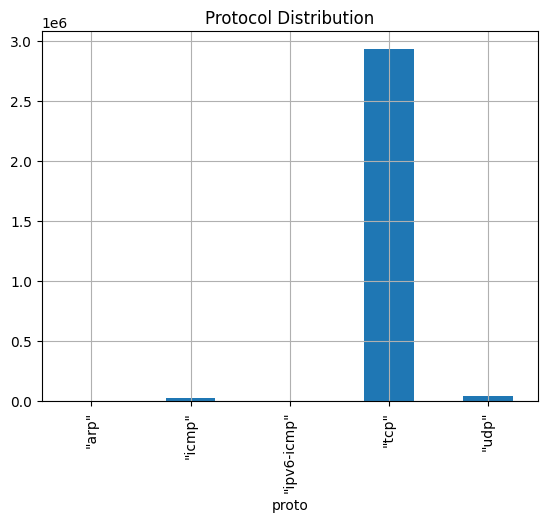

In [7]:
df.groupby('proto').size().plot(kind='bar')
plt.title('Protocol Distribution')
plt.grid()
plt.show()

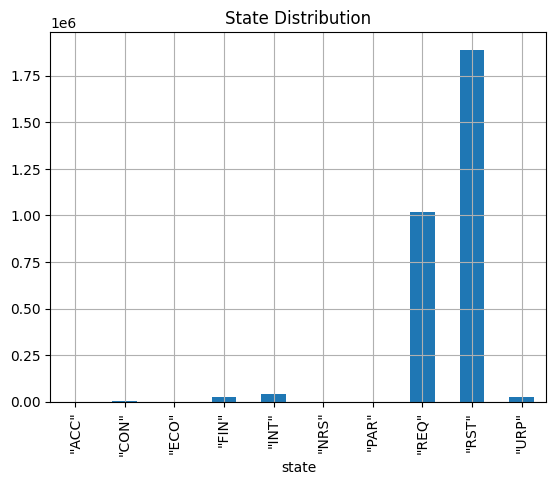

In [8]:
df.groupby('state').size().plot(kind='bar')
plt.title('State Distribution')
plt.grid()
plt.show()

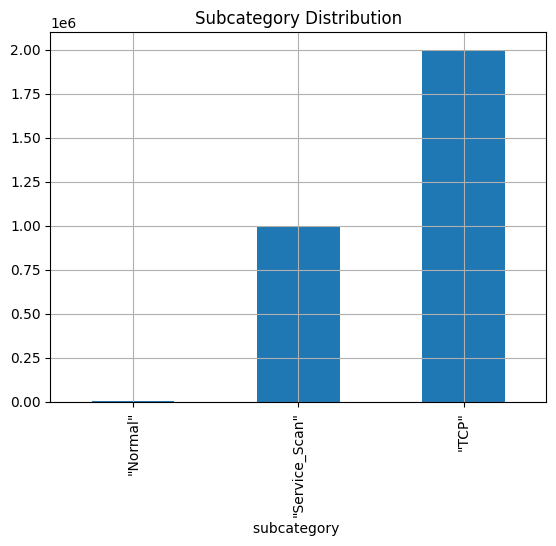

In [9]:
df.groupby('subcategory ').size().plot(kind='bar')
plt.title('Subcategory Distribution')
plt.grid()
plt.show()

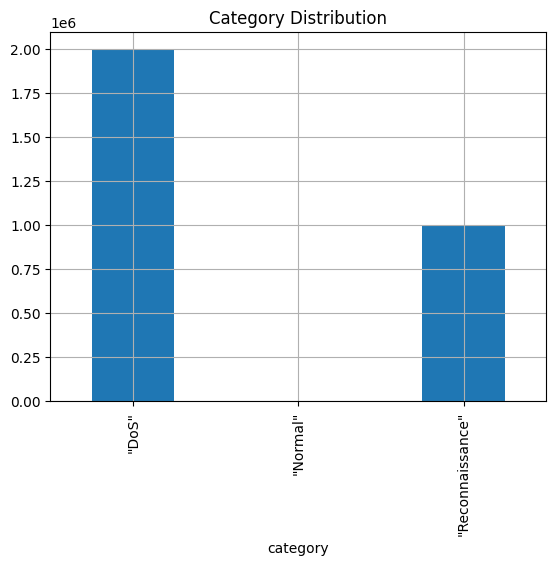

In [10]:
df.groupby('category').size().plot(kind='bar')
plt.title('Category Distribution')
plt.grid()
plt.show()

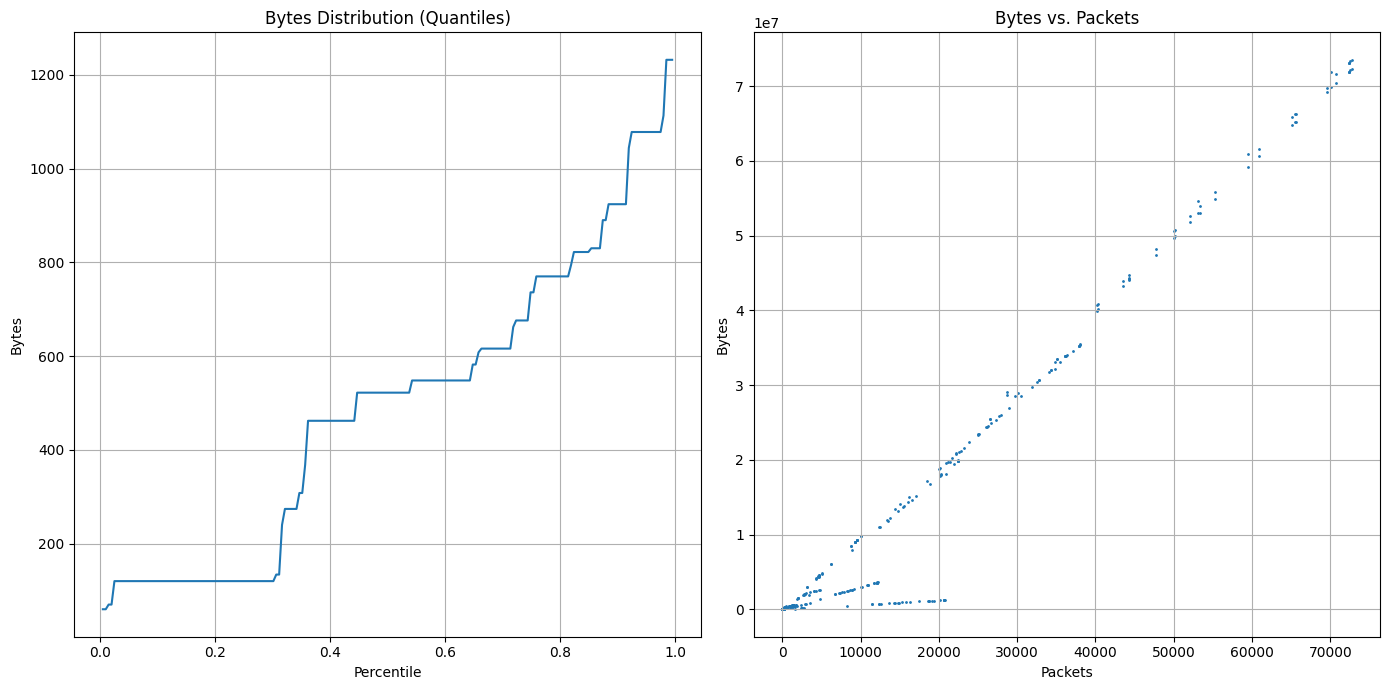

In [11]:
# Plotting quantiles
df_bytes = df['bytes'].astype(float).dropna()
percentiles = np.linspace(0, 1, 200)[1:-1]
quantiles = df_bytes.quantile(percentiles)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Plotting quantiles
axes[0].set_title('Bytes Distribution (Quantiles)')
axes[0].plot(percentiles, quantiles)
axes[0].set_ylabel('Bytes')
axes[0].set_xlabel('Percentile')
axes[0].grid()

# Plotting scatter plot
axes[1].set_title('Bytes vs. Packets')
axes[1].scatter(df['pkts'].astype(float).dropna(), df['bytes'].astype(float).dropna(), s=1)
axes[1].set_xlabel('Packets')
axes[1].set_ylabel('Bytes')
axes[1].grid()

plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing
Within this phase, the `networkx` library will be employed to construct a graph from our dataset. Specifically, a `MultiDiGraph` will be utilized, considering that each packet possesses distinct source and destination attributes, as well as start and end characteristics, thereby constituting a directed graph. Additionally, a `MultiGraph` will be utilized to account for instances where a packet may be sent multiple times, rendering it a multi-graph. The `tqdm` library is employed in the iteration process to provide a progress bar, especially beneficial when dealing with a sizable dataset containing 3 million entries. The progress bar keeps the user informed about the completion status, enhancing the overall transparency of the graph-building process.

#### 2.1 Graph - Nodes as IP Addresses

In this section, each IP address is represented as a node in the graph, a logical choice as each IP signifies a distinct machine. The resulting graph will feature as many nodes as there are unique IP addresses. However, a caveat arises with IPv4 and IPv6 addresses, which may pertain to a single machine yet are treated as separate nodes.

The networkx package facilitates a straightforward conversion of a `DataFrame` to a graph. The `from_pandas_edgelist` function will be employed for this purpose, utilizing the `'saddr'` and `'daddr'` fields as source and destination nodes, respectively. The remaining fields will be employed as edge attributes. The resulting graph will be a `MultiDiGraph`, as each packet possesses distinct source and destination attributes, as well as start and end characteristics, thereby constituting a directed graph. Additionally, a `MultiGraph` will be utilized to account for instances where a packet may be sent multiple times, rendering it a multi-graph.

In [12]:
time_0 = time()
Graph_1 = nx.MultiDiGraph()
for i, row in tqdm(df.iterrows(), total=df.shape[0], desc='Building graph'):
	Graph_1.add_node(row['saddr'])
	Graph_1.add_node(row['daddr'])
	Graph_1.add_edge(row['saddr'], row['daddr'], **row.to_dict())

print('IP graph created in {:.2f} seconds'.format(time() - time_0))

Building graph:   0%|          | 0/3000000 [00:00<?, ?it/s]

IP graph created in 488.98 seconds


#### 2.2 Graph - Nodes as Events

In this context, each packet is depicted as an individual node, resulting in the addition of nodes corresponding to the total number of packets. Furthermore, edges will be incorporated between nodes sharing identical source and destination IP addresses.

Our initial strategy involved a nested loop iteration over nodes to establish edges, which proved to be notably sluggish. Subsequently, an optimized approach was adopted by leveraging a dictionary to store nodes with matching source and destination IP addresses, significantly enhancing computational efficiency.


In [13]:
def updateEdge(graph: nx.Graph, node1: int, node2: int) -> None:
    """
    Update edge weight between two nodes in the graph.

    Parameters:
    - graph (nx.Graph): The graph to update.
    - node1 (int): First node.
    - node2 (int): Second node.
    """
    edge = graph.get_edge_data(node1, node2, default=None)
    if edge is None:
        graph.add_edge(node1, node2, weight=1)
    else:
        edge['weight'] += 1

def processNode(graph: nx.Graph, node: int, direction: str, node_map: dict, blacklist: set) -> None:
    """
    Process a node and update edges in the graph based on the specified direction.

    Parameters:
    - graph (nx.Graph): The graph to update.
    - node (int): The node to process.
    - direction (str): The direction to consider ('saddr' or 'daddr').
    - node_map (dict): Mapping of nodes.
    - blacklist (set): Set of nodes to ignore.
    """
    if node in blacklist:
        return
    nodelist = node_map.get(graph.nodes[node][direction], None)
    if nodelist is not None:
        for node2 in nodelist:
            if node != node2:
                updateEdge(graph, node, node2)
                blacklist.add(node2)

# Initialization
time_0 = time()
Graph_2 = nx.Graph()
node_map = {}
blacklist = set()

# Creating nodes
for i, row in tqdm(df.iterrows(), total=df.shape[0], desc='Creating nodes'):
    attributes = row.to_dict()
    Graph_2.add_node(i, **attributes)
    for direction in ['saddr', 'daddr']:
        element = node_map.get(row[direction], None)
        if element is None:
            node_map[row[direction]] = [i]
        else:
            element.append(i)

# Creating edges
for node in tqdm(Graph_2.nodes, total=Graph_2.number_of_nodes(), desc='Creating edges'):
    processNode(Graph_2, node, 'saddr', node_map, blacklist)
    processNode(Graph_2, node, 'daddr', node_map, blacklist)

# Displaying elapsed time
elapsed_time = time() - time_0
if elapsed_time >= 60:
    minutes, seconds = divmod(elapsed_time, 60)
    print('Event graph created in {} minutes and {:.2f} seconds'.format(int(minutes), seconds))
else:
    print('Event graph created in {:.2f} seconds'.format(elapsed_time))

Creating nodes:   0%|          | 0/3000000 [00:00<?, ?it/s]

Creating edges:   0%|          | 0/3000000 [00:00<?, ?it/s]

Event graph created in 8 minutes and 41.11 seconds


#### 2.3 Graph - Graph Builder

The following is a straightforward function designed to construct a graph from a pandas DataFrame. This function essentially serves as a wrapper around the `from_pandas_edgelist` function.

In [14]:
def buildGraph(df: pd.DataFrame, source: str, target: str, edge_attr: list or True or None,
                create_using = nx.MultiDiGraph) -> nx.MultiDiGraph:
    """
    Builds a graph from a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): DataFrame to build the graph from.
    - source (str): Name of the column that contains the source nodes.
    - target (str): Name of the column that contains the target nodes.
    - edge_attr (list or True or None): List of column names that will be used as edge attributes.
    - create_using (Callable): Type of graph to create.
    
    Returns:
    - graph (nx.MultiDiGraph): Graph.
    """
    t0 = time()
    graph = create_using()
    for i, row_i in tqdm(df.iterrows(), total=df.shape[0], desc='Creating nodes'):
        graph.add_node(row_i[source])
        graph.add_node(row_i[target])

    if edge_attr is True:
        edge_attr = df.columns.tolist()
        edge_attr.remove(source)
        edge_attr.remove(target)

    for i, row_i in tqdm(df.iterrows(), total=df.shape[0], desc='Creating edges'):
        attrs_i = row_i.to_dict()
        if edge_attr is not None:
            attrs_i = {k: v for k, v in attrs_i.items() if k in edge_attr}
        graph.add_edge(row_i[source], row_i[target], **attrs_i)
    # Displaying elapsed time
    elapsed_time = time() - t0
    if elapsed_time >= 60:
        minutes, seconds = divmod(elapsed_time, 60)
        print('Graph created in {} minutes and {:.2f} seconds'.format(int(minutes), seconds))
    else:
        print('Graph created in {:.2f} seconds'.format(elapsed_time))

    return graph

#### 2.4.1. Graph - Nodes as Ports

In [15]:
Graph_3 = buildGraph(df, 'sport', 'dport', ['proto', 'saddr', 'daddr'])
print('Number of nodes: {}'.format(Graph_3.number_of_nodes()))
print('Number of edges: {}'.format(Graph_3.number_of_edges()))

Creating nodes:   0%|          | 0/3000000 [00:00<?, ?it/s]

Creating edges:   0%|          | 0/3000000 [00:00<?, ?it/s]

Graph created in 11 minutes and 5.28 seconds
Number of nodes: 66597
Number of edges: 3000000


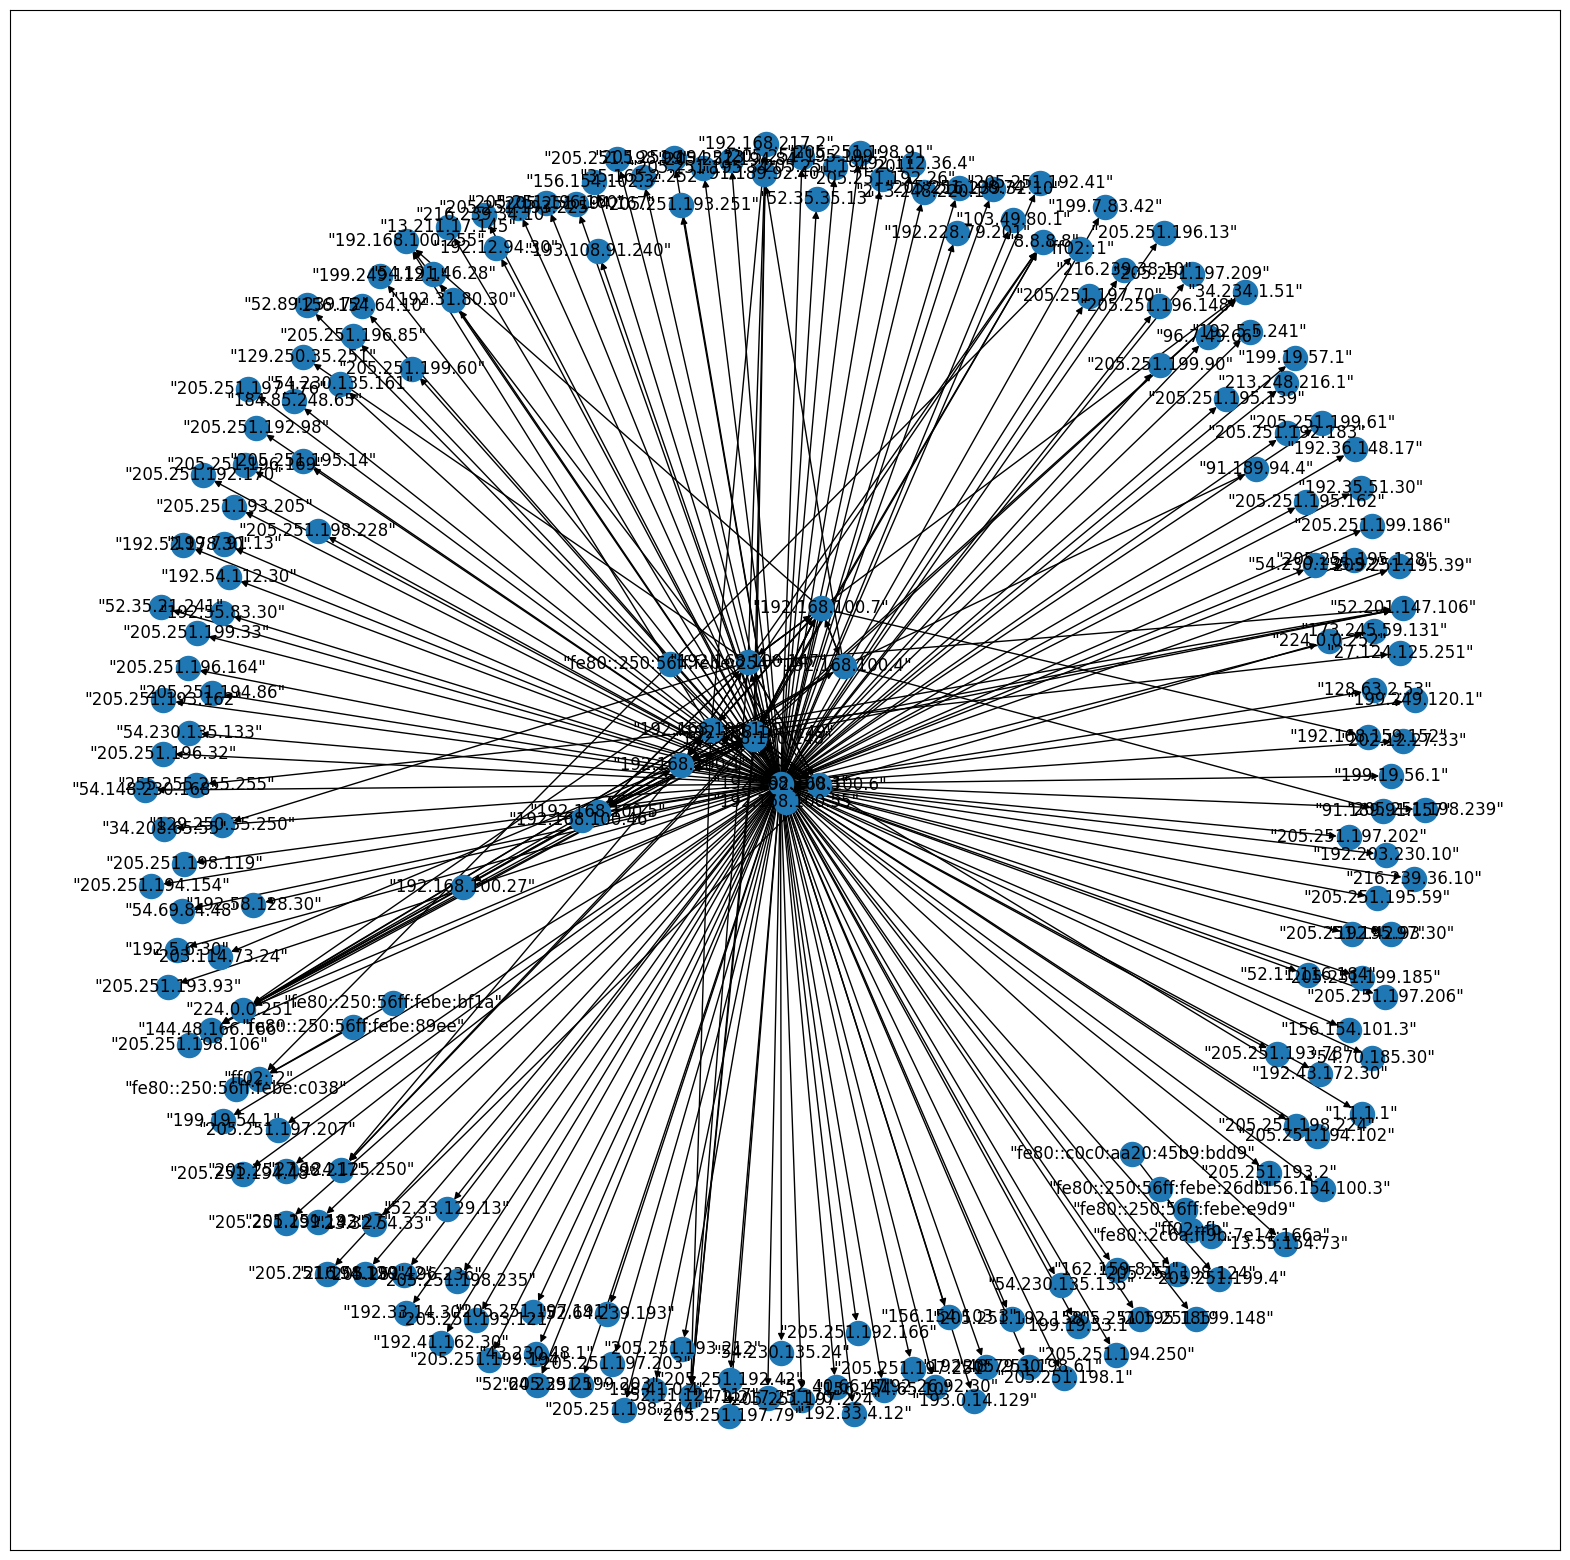

In [16]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(nx.DiGraph(Graph_1), with_labels=True)
plt.show()